# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

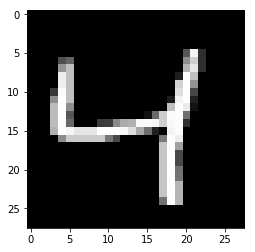

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

(60000, 784)

In [7]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name = "inputs")
targets_ = tf.placeholder(tf.float32, (None, image_size), name = "target")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="output")

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [8]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [9]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6935
Epoch: 1/20... Training loss: 0.6903
Epoch: 1/20... Training loss: 0.6870
Epoch: 1/20... Training loss: 0.6836
Epoch: 1/20... Training loss: 0.6788
Epoch: 1/20... Training loss: 0.6729
Epoch: 1/20... Training loss: 0.6674
Epoch: 1/20... Training loss: 0.6595
Epoch: 1/20... Training loss: 0.6504
Epoch: 1/20... Training loss: 0.6414
Epoch: 1/20... Training loss: 0.6308
Epoch: 1/20... Training loss: 0.6159
Epoch: 1/20... Training loss: 0.6017
Epoch: 1/20... Training loss: 0.5874
Epoch: 1/20... Training loss: 0.5724
Epoch: 1/20... Training loss: 0.5580
Epoch: 1/20... Training loss: 0.5418
Epoch: 1/20... Training loss: 0.5251
Epoch: 1/20... Training loss: 0.5047
Epoch: 1/20... Training loss: 0.4861
Epoch: 1/20... Training loss: 0.4685
Epoch: 1/20... Training loss: 0.4569
Epoch: 1/20... Training loss: 0.4360
Epoch: 1/20... Training loss: 0.4206
Epoch: 1/20... Training loss: 0.4022
Epoch: 1/20... Training loss: 0.3942
Epoch: 1/20... Training loss: 0.3819
E

Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1826
Epoch: 1/20... Training loss: 0.1926
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1832
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1781
Epoch: 1/20... Training loss: 0.1801
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1831
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1821
Epoch: 1/20... Training loss: 0.1826
Epoch: 1/20... Training loss: 0.1816
Epoch: 1/20... Training loss: 0.1818
Epoch: 1/20... Training loss: 0.1811
Epoch: 1/20... Training loss: 0.1811
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1821
Epoch: 1/20... Training loss: 0.1808
E

Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1609
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1483
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1494
E

Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1255
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1291
Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1279
Epoch: 3/20... Training loss: 0.1337
E

Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1258
E

Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1215
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1181
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1204
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1164
E

Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1050
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1095
E

Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.0990
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.0997
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.0999
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1050
E

Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1054
Epoch: 7/20... Training loss: 0.1075
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0988
E

Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1027
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1034
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1009
E

Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.1009
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0923
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0983
E

Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0927
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training 

Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0898
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.1016
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.1021
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0997
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0902
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0910
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0998
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0995
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0981
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0901
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0883
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0982
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0888
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0987
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0980
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0885
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0877
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0895
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0981
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0981
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.1002
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

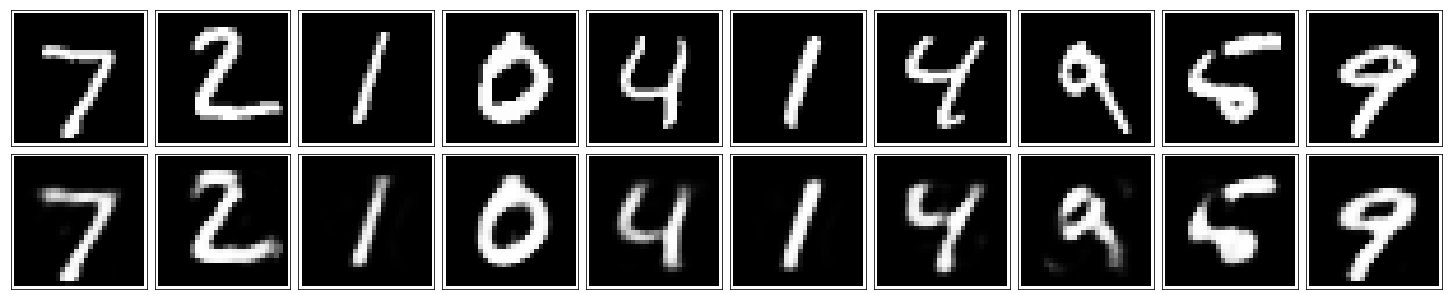

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.